In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import numpy as np
import pandas as pd
# Plot Images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
plt.style.use('ggplot')
import matplotlib
# Set GPU usage
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# Plotly 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
cd ..

/home/anirudh/github/aip-eval


In [3]:
from studio.evaluation.keras import metrics, utils, visualizer
from studio.evaluation.keras.evaluators import CNNEvaluator
from studio.evaluation.keras.evaluators import Evaluator
from studio.evaluation.keras.evaluators import SequentialCNNEvaluator
from studio.evaluation.keras.evaluators import VisualQAEvaluator
from visual_qa.visual_qa import VisualQA

Using TensorFlow backend.


In [4]:
report_dir = 'evaluation/'
model_path = '/data/models/133_way_april_2019/ensemble/xception/model_max_acc_1gpu.h5'
visual_dictionary = 'qa-data/data/visual_classifier/133_way_min_150_images_april_2019_model_map_diagnosis_nodes.json'
by_definition_csv = 'qa-data/data/by-definition/diag_by_definition_matrix_never_must.csv'
qa_data_json = 'qa-data/data/testset/testset.json'
valid_evidence = 'qa-data/data/by-definition/valid_evidence.json'
visual_data_dir = '/data/datasets/visual_qa/v_1/test_set_squared_cropped'

In [5]:
cnn_evaluator = CNNEvaluator(
        concept_dictionary_path=None,
        custom_objects=None,
        concepts=None,
        model_path=model_path,
        batch_size=32,
        verbose=0)

Instructions for updating:
Colocations handled automatically by placer.


/home/anirudh/github/aip-eval/.venv/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning:

No training configuration found in save file: the model was *not* compiled. Compile it manually.



In [6]:
visual_qa_evaluator = VisualQAEvaluator(
    report_dir=report_dir,
    qa_data_json = qa_data_json,
    visual_dictionary = visual_dictionary,
    by_definition_csv = by_definition_csv,
    valid_evidence = valid_evidence
)

/home/anirudh/github/aip-eval/.venv/lib/python3.6/site-packages/visual_qa/data_manager.py:37: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



In [7]:
filtered_testset = visual_qa_evaluator.filtered_qa_data

In [8]:
filtered_diagnosis_ids = list(visual_qa_evaluator.visual_qa.visual_diagnosis_ids)

In [9]:
labels = []
image_paths = []
for sample in filtered_testset:
    image_paths.append(os.path.join(visual_data_dir, sample["image_id"]))
    labels.append(filtered_diagnosis_ids.index(sample['diagnosis_id']))
    
probs = cnn_evaluator.predict(image_paths)
labels = np.array(labels)

Making predictions from model  0
2/3 [===================>..........] - ETA: 4s 
Processing remainder: 9


In [10]:
book_visual_result = cnn_evaluator.get_metrics(probs, labels, top_k=5, concept_labels=filtered_diagnosis_ids)

In [11]:
cnn_evaluator.plot_top_k_accuracy()

### Visual QA Evaluation with Combined mode

In [12]:
book_combination_result = visual_qa_evaluator.evaluate(probs, differential=True)

In [13]:
# Evaluator functions can be used on visual_qa_evaluator object
visual_qa_evaluator.plot_top_k_accuracy()

In [14]:
# If image paths assigned you can plot use Evaluator plot functions
visual_qa_evaluator.image_paths = image_paths

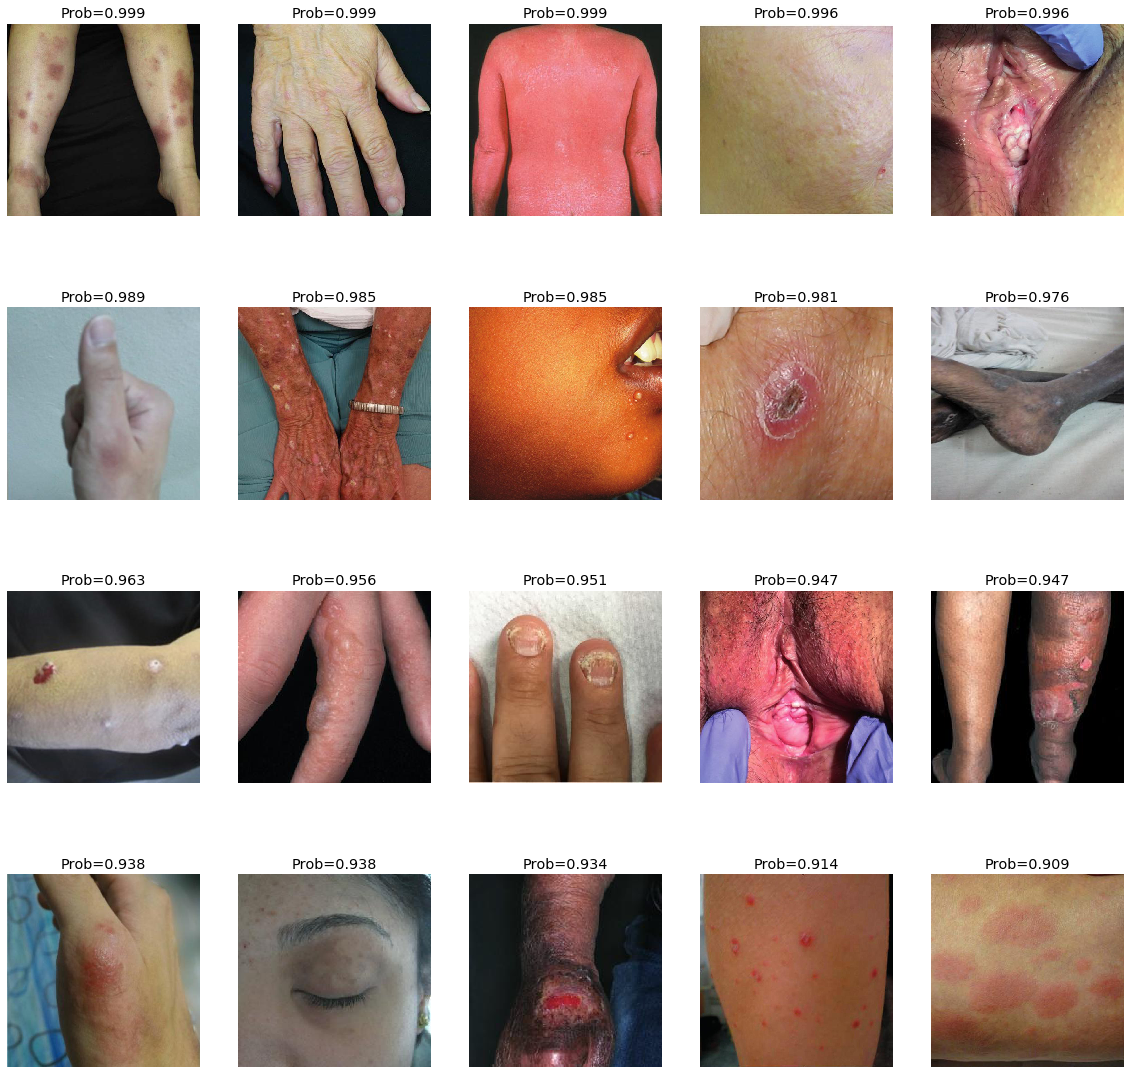

In [15]:
l = visual_qa_evaluator.plot_most_confident()

In [16]:
visual_qa_evaluator.get_errors_confusion_matrix_df()

,matrix_square,count
0,nummular dermatitis_contact dermatitis,4
1,pityriasis lichenoides_guttate psoriasis,2
2,skin disorder caused by arthropod bite_keratoa...,2
3,hand-foot-and-mouth disease_urticaria,2
4,stasis dermatitis_ulcer,2
5,nummular dermatitis_prurigo nodularis,2
6,prurigo nodularis_warts nonspecific,2
7,porokeratosis_pigmented purpuric eruption,2
8,pityriasis rosea_urticaria,1
9,nummular dermatitis_bruise,1


In [17]:
utils.compare_visual_by_definition_results(book_visual_result['average']['accuracy'] ,book_combination_result['average']['accuracy'] )

,Mode,top_1,top_2,top_3,top_4,top_5
0,Visual,0.323809,0.485714,0.523810,0.590476,0.619048
1,Visual_QA,0.285714,0.428571,0.466667,0.485714,0.523810


### Exclusion mode

In [18]:
book_combination_result = visual_qa_evaluator.evaluate(probs, mode='exclusion', differential=True)

In [19]:
utils.compare_visual_by_definition_results(book_visual_result['average']['accuracy'] ,book_combination_result['average']['accuracy'] )

,Mode,top_1,top_2,top_3,top_4,top_5
0,Visual,0.323809,0.485714,0.523810,0.590476,0.619048
1,Visual_QA,0.323809,0.466667,0.495238,0.561905,0.590476


### Inclusion mode

In [20]:
book_combination_result = visual_qa_evaluator.evaluate(probs, mode='inclusion', differential=True)

In [21]:
utils.compare_visual_by_definition_results(book_visual_result['average']['accuracy'] ,book_combination_result['average']['accuracy'] )

,Mode,top_1,top_2,top_3,top_4,top_5
0,Visual,0.323809,0.485714,0.523810,0.590476,0.619048
1,Visual_QA,0.285714,0.447619,0.495238,0.514286,0.552381


In [22]:
visual_qa_evaluator.find_top_k_questions(top_k=5)

['characteristic_borders',
 'body_temperature',
 'average_size',
 'type_sensations',
 'age']

In [23]:
visual_qa_evaluator.find_top_k_questions_sequential(top_k=5)

['characteristic_borders',
 'characteristic_groupings',
 'characteristic_hair',
 'characteristic_shape',
 'characteristic_surface']